In [1]:
#!pip install mediapipe

In [2]:
import mediapipe as mp
import cv2
import time
import numpy as np
import pandas as pd
import os

In [3]:
mpPose = mp.solutions.pose
pose = mpPose.Pose()
mpDraw = mp.solutions.drawing_utils # For drawing keypoints
points = mpPose.PoseLandmark # Landmarks
path = "C:\\Users\\AISHWARYA UBALE\\Downloads\\archive (6)\\DATASET\\TRAIN" # enter dataset path
data = []
for p in points:
        x = str(p)[13:]
        data.append(x + "_x")
        data.append(x + "_y")
        data.append(x + "_z")
        data.append(x + "_vis")

data.append("target")
data = pd.DataFrame(columns = data) # Empty dataset

In [4]:
import mediapipe as mp

# Assume mpPose.PoseLandmark is the enum variable
points = mp.solutions.pose.PoseLandmark

# Print the names of the landmarks
for landmark in points:
    print(landmark.name)
    
len(points)

NOSE
LEFT_EYE_INNER
LEFT_EYE
LEFT_EYE_OUTER
RIGHT_EYE_INNER
RIGHT_EYE
RIGHT_EYE_OUTER
LEFT_EAR
RIGHT_EAR
MOUTH_LEFT
MOUTH_RIGHT
LEFT_SHOULDER
RIGHT_SHOULDER
LEFT_ELBOW
RIGHT_ELBOW
LEFT_WRIST
RIGHT_WRIST
LEFT_PINKY
RIGHT_PINKY
LEFT_INDEX
RIGHT_INDEX
LEFT_THUMB
RIGHT_THUMB
LEFT_HIP
RIGHT_HIP
LEFT_KNEE
RIGHT_KNEE
LEFT_ANKLE
RIGHT_ANKLE
LEFT_HEEL
RIGHT_HEEL
LEFT_FOOT_INDEX
RIGHT_FOOT_INDEX


33

In [5]:
type(data)

pandas.core.frame.DataFrame

In [6]:
data.head()

,NOSE_x,NOSE_y,NOSE_z,NOSE_vis,LEFT_EYE_INNER_x,LEFT_EYE_INNER_y,LEFT_EYE_INNER_z,LEFT_EYE_INNER_vis,LEFT_EYE_x,LEFT_EYE_y,...,RIGHT_HEEL_vis,LEFT_FOOT_INDEX_x,LEFT_FOOT_INDEX_y,LEFT_FOOT_INDEX_z,LEFT_FOOT_INDEX_vis,RIGHT_FOOT_INDEX_x,RIGHT_FOOT_INDEX_y,RIGHT_FOOT_INDEX_z,RIGHT_FOOT_INDEX_vis,target


In [7]:
#Original
# count = 0

# for img in os.listdir(path):

#         temp = []

#         img = cv2.imread(path + "/" + img)

#         imageWidth, imageHeight = img.shape[:2]

#         imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#         blackie = np.zeros(img.shape) # Blank image

#         results = pose.process(imgRGB)

#         if results.pose_landmarks:

#                 # mpDraw.draw_landmarks(img, results.pose_landmarks, mpPose.POSE_CONNECTIONS) #draw landmarks on image

#                 mpDraw.draw_landmarks(blackie, results.pose_landmarks, mpPose.POSE_CONNECTIONS) # draw landmarks on blackie

#                 landmarks = results.pose_landmarks.landmark

#                 for i,j in zip(points,landmarks):

#                         temp = temp + [j.x, j.y, j.z, j.visibility]
                
#                 #Assign target value (0 for the first pose, 1 for the rest)
#                 if
#                 target = 80 if count <= 20 else 1
                
#                 temp.append(target)
                
#                 data.loc[count] = temp

#                 count +=1

#         #cv2.imshow("Image", img)

#         #cv2.imshow("blackie",blackie)

#         #cv2.waitKey(100)

# data.to_csv("dataset3_with target1.csv") # save the data as a csv file

In [8]:
path = "C:\\Users\\AISHWARYA UBALE\\Downloads\\archive (6)\\DATASET\\TRAIN"

#                 elif imgfolder == "tree":
#                     target = 2 
#                 elif imgfolder == "goddess":
#                     target = 3
count = 0
counterfolder = 0;
for imgfolder in os.listdir(path):
    print(imgfolder)
        
    imgpath = path + "\\" + imgfolder
    print(imgpath)
    for img in os.listdir(imgpath):
        
        temp = []
        #print(img)
        img = cv2.imread(imgpath + "\\" + img)
        imageWidth, imageHeight = img.shape[:2]

        imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        blackie = np.zeros(img.shape) # Blank image

        results = pose.process(imgRGB)

        if results.pose_landmarks:

                mpDraw.draw_landmarks(blackie, results.pose_landmarks, mpPose.POSE_CONNECTIONS) # draw landmarks on blackie

                landmarks = results.pose_landmarks.landmark

                for i,j in zip(points,landmarks):

                        temp = temp + [j.x, j.y, j.z, j.visibility]
                
                #Assign target value (0 for the first pose, 1 for the rest)
                if imgfolder == "plank":
                    target = 0 
                elif imgfolder == "warrior2":
                    target = 1
                elif imgfolder == "tree":
                    target = 2 
                elif imgfolder == "downdog":
                    target = 3
                elif imgfolder == "goddess":
                    
                    target = 4
                    
                temp.append(target)
                
                data.loc[count] = temp

                count +=1

data.to_csv("training_dataset_with target_all3posses.csv") # save the data as a csv file

downdog
C:\Users\AISHWARYA UBALE\Downloads\archive (6)\DATASET\TRAIN\downdog
goddess
C:\Users\AISHWARYA UBALE\Downloads\archive (6)\DATASET\TRAIN\goddess
plank
C:\Users\AISHWARYA UBALE\Downloads\archive (6)\DATASET\TRAIN\plank
tree
C:\Users\AISHWARYA UBALE\Downloads\archive (6)\DATASET\TRAIN\tree
warrior2
C:\Users\AISHWARYA UBALE\Downloads\archive (6)\DATASET\TRAIN\warrior2


In [9]:
###skipping for now

path = "C:\\Users\\AISHWARYA UBALE\\Downloads\\archive (6)\\DATASET\\TEST"

count = 0
data.drop(data.index, inplace=True)
counterfolder = 0;
for imgfolder in os.listdir(path):
    print(imgfolder)
    imgpath = path + "//" + imgfolder
    for img in os.listdir(imgpath):
        
        temp = []
        #print(img)
        img = cv2.imread(imgpath + "/" + img)
        
        imageWidth, imageHeight = img.shape[:2]

        imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        blackie = np.zeros(img.shape) # Blank image

        results = pose.process(imgRGB)

        if results.pose_landmarks:

                mpDraw.draw_landmarks(blackie, results.pose_landmarks, mpPose.POSE_CONNECTIONS) # draw landmarks on blackie

                landmarks = results.pose_landmarks.landmark

                for i,j in zip(points,landmarks):

                        temp = temp + [j.x, j.y, j.z, j.visibility]
                
                #Assign target value (0 for the first pose, 1 for the rest)
                if imgfolder == "plank":
                    target = 0 
                elif imgfolder == "warrior2":
                    target = 1
                elif imgfolder == "tree":
                    target = 2 
                elif imgfolder == "downdog":
                    target = 3
                elif imgfolder == "goddess":
                    target = 4
                
                temp.append(target)
                
                data.loc[count] = temp

                count +=1

data.to_csv("testing_dataset3_with target_allposses.csv") # save the data as a csv file

downdog
goddess
plank
tree
warrior2


In [10]:
###Printing first image from each class

In [11]:
# import os
# import matplotlib.pyplot as plt
# from PIL import Image

# # Directory containing class folders (adjust this path according to your directory structure)
# train_directory = "C:\\Users\\AISHWARYA UBALE\\Downloads\\archive (6)\\DATASET\\TRAIN"
# # test_directory = "C:\\Users\\AISHWARYA UBALE\\Downloads\\archive (6)\\DATASET\\TEST"

# def printFirstImage(class_directory):
#     # Assuming each subfolder in 'TRAIN' represents a class
#     class_folders = sorted(os.listdir(class_directory))
#     # Display one image from each class folder
#     for class_folder in class_folders:
#         class_path = os.path.join(train_directory, class_folder)
#         image_files = os.listdir(class_path)
        
#         # Choose the first image in the class folder (you can modify this logic as needed
#         if len(image_files) > 0:
#             image_path = os.path.join(class_path, image_files[0])
#             img = Image.open(image_path)
#             # Display image and class label
#             plt.imshow(img)
#             plt.title(f"Class: {class_folder}")
#             plt.axis('off')
#             plt.show()

#     return


# print("Training dataset Images from all the 5 classes:\n")
# printFirstImage(train_directory)


In [12]:
# import os
# import matplotlib.pyplot as plt
# from PIL import Image
# import numpy as np

# def display_images_in_grid(class_directory):
#     # Assuming each subfolder in the class directory represents a class
#     class_folders = sorted(os.listdir(class_directory))
#     num_classes = len(class_folders)
    
#     # Define grid layout parameters dynamically based on the number of classes
#     rows = 2
#     cols = (num_classes + rows - 1) // rows
    
#     fig, axes = plt.subplots(rows, cols, figsize=(12, 6))  # Create a grid of subplots
    
#     # Flatten axes if necessary
#     if isinstance(axes, np.ndarray):
#         axes = axes.flatten()
#     else:
#         axes = [axes]
    
#     # Display one image from each class folder in the grid
#     for i, class_folder in enumerate(class_folders):
#         class_path = os.path.join(class_directory, class_folder)
#         image_files = os.listdir(class_path)
        
#         if len(image_files) > 0:
#             image_path = os.path.join(class_path, image_files[0])
#             img = Image.open(image_path)
            
#             # Display image in the corresponding subplot
#             axes[i].imshow(img)
#             axes[i].set_title(f"Class: {class_folder}")
#             axes[i].axis('off')
    
#     # Hide empty subplots
#     for j in range(num_classes, rows * cols):
#         axes[j].axis('off')
#         axes[j].set_visible(False)
    
#     plt.tight_layout()  # Adjust layout
#     plt.show()

# train_directory = "C:\\Users\\AISHWARYA UBALE\\Downloads\\archive (6)\\DATASET\\TRAIN"
# display_images_in_grid(train_directory)


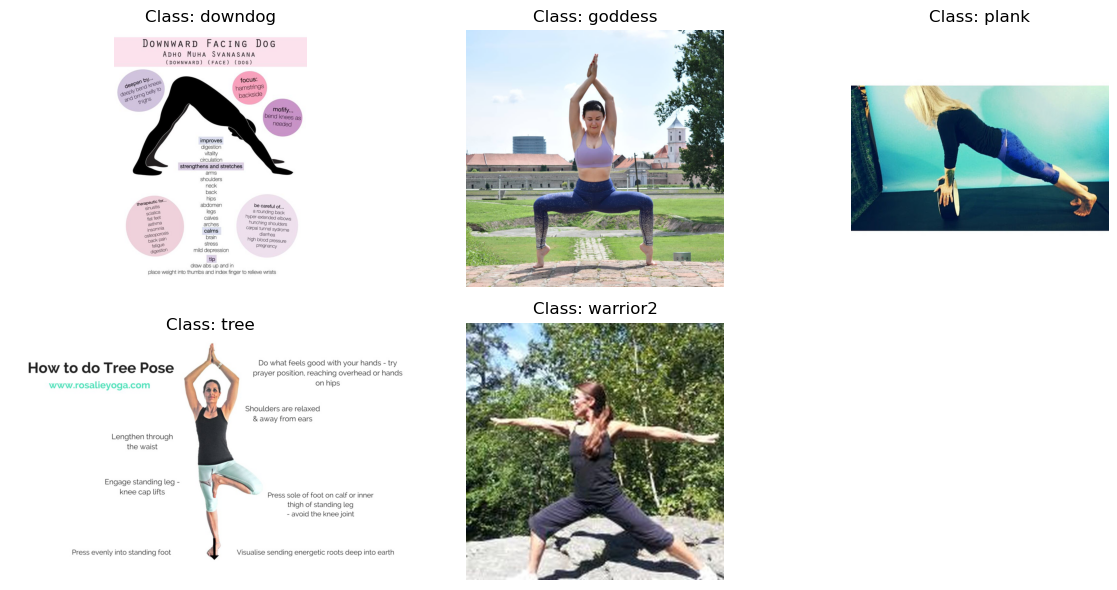

In [13]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import random

def display_random_images_in_grid(class_directory):
    # Assuming each subfolder in the class directory represents a class
    class_folders = sorted(os.listdir(class_directory))
    num_classes = len(class_folders)
    
    # Define grid layout parameters dynamically based on the number of classes
    rows = 2
    cols = (num_classes + rows - 1) // rows
    
    fig, axes = plt.subplots(rows, cols, figsize=(12, 6))  # Create a grid of subplots
    
    # Flatten axes if necessary
    if isinstance(axes, np.ndarray):
        axes = axes.flatten()
    else:
        axes = [axes]
    
    # Display a random image from each class folder in the grid
    for i, class_folder in enumerate(class_folders):
        class_path = os.path.join(class_directory, class_folder)
        image_files = os.listdir(class_path)
        
        if len(image_files) > 0:
            random_image = random.choice(image_files)  # Select a random image
            image_path = os.path.join(class_path, random_image)
            img = Image.open(image_path)
            
            # Display image in the corresponding subplot
            axes[i].imshow(img)
            axes[i].set_title(f"Class: {class_folder}")
            axes[i].axis('off')
    
    # Hide empty subplots
    for j in range(num_classes, rows * cols):
        axes[j].axis('off')
        axes[j].set_visible(False)
    
    plt.tight_layout()  # Adjust layout
    plt.show()

train_directory = "C:\\Users\\AISHWARYA UBALE\\Downloads\\archive (6)\\DATASET\\TRAIN"
display_random_images_in_grid(train_directory)


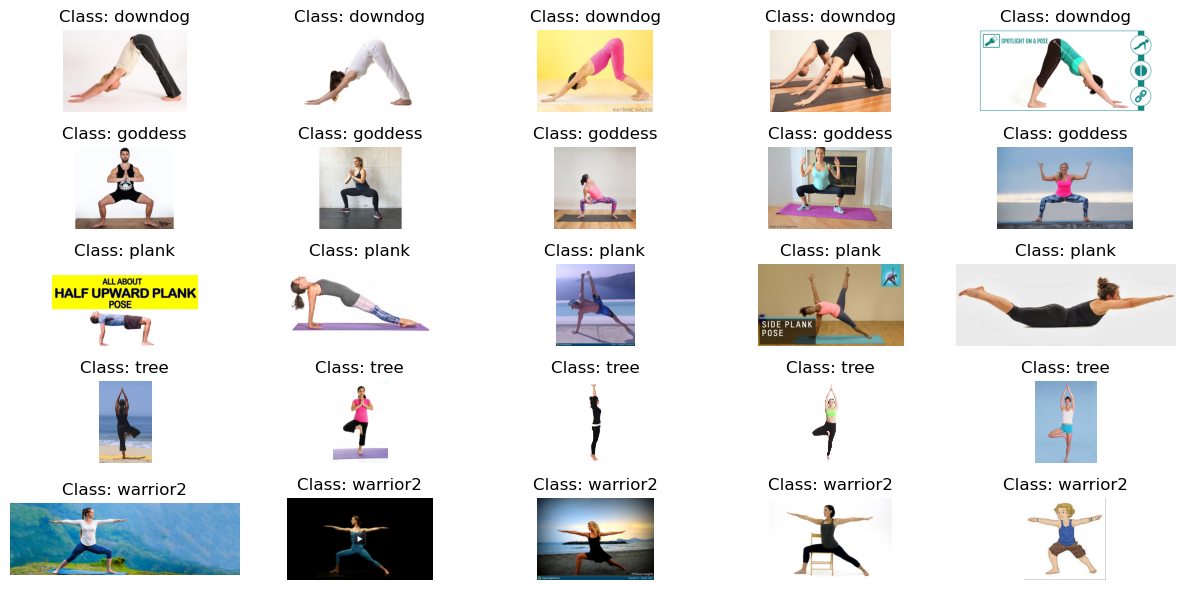

In [16]:
def display_first_images_in_grid(class_directory, num_images_per_class=5):
    class_folders = sorted(os.listdir(class_directory))
    num_classes = len(class_folders)
    
    rows = num_images_per_class
    cols = (num_classes * num_images_per_class + rows - 1) // rows
    
    fig, axes = plt.subplots(rows, cols, figsize=(12, 6))
    
    if isinstance(axes, np.ndarray):
        axes = axes.flatten()
    else:
        axes = [axes]
    
    for i, class_folder in enumerate(class_folders):
        class_path = os.path.join(class_directory, class_folder)
        image_files = os.listdir(class_path)
        
        # Display the first few images from each class folder
        for j in range(num_images_per_class):
            if j < len(image_files):  # Check if there are enough images in the class folder
                image_path = os.path.join(class_path, image_files[j])
                img = Image.open(image_path)
                
                # Display image in the corresponding subplot
                axes[i * num_images_per_class + j].imshow(img)
                axes[i * num_images_per_class + j].set_title(f"Class: {class_folder}")
                axes[i * num_images_per_class + j].axis('off')
    
    # Hide empty subplots
    for k in range(num_classes * num_images_per_class, rows * cols):
        axes[k].axis('off')
        axes[k].set_visible(False)
    
    plt.tight_layout()
    plt.show()

train_directory = "C:\\Users\\AISHWARYA UBALE\\Downloads\\archive (6)\\DATASET\\TRAIN"
display_first_images_in_grid(train_directory, num_images_per_class=5)


In [14]:
##CLASS Distribution

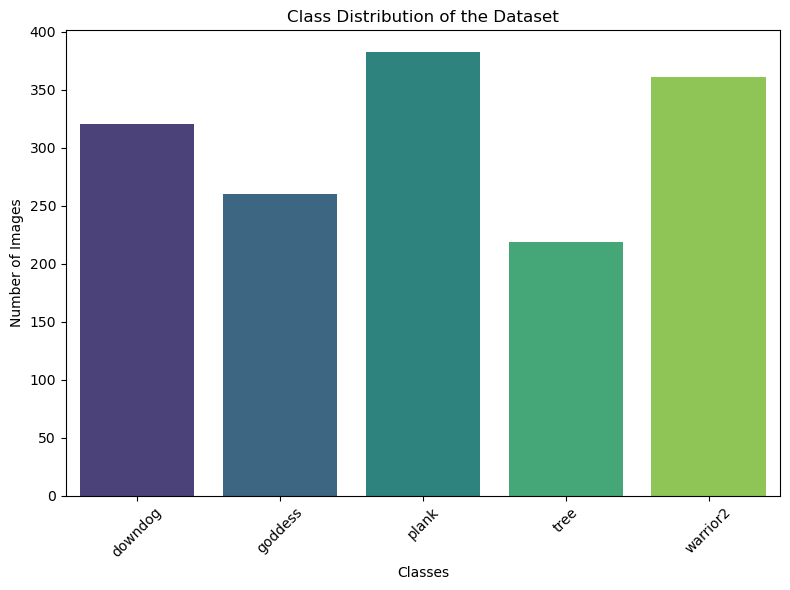

In [15]:
import os
import seaborn as sns
import matplotlib.pyplot as plt

def plot_class_distribution(dataset_directories):
    class_counts = {}
    
    # Loop through each dataset directory (TRAIN and TEST)
    for directory in dataset_directories:
        # Assuming each subfolder in the directory represents a class
        class_folders = os.listdir(directory)
        
        # Count the number of images in each class folder
        for class_folder in class_folders:
            class_path = os.path.join(directory, class_folder)
            image_count = len(os.listdir(class_path))
            
            # Update the class counts dictionary
            class_counts[class_folder] = class_counts.get(class_folder, 0) + image_count
    
    # Convert class_counts dictionary to DataFrame for Seaborn
    class_data = {'Classes': list(class_counts.keys()), 'Number of Images': list(class_counts.values())}
    class_df = pd.DataFrame(class_data)
    
    # Plotting the class distribution using Seaborn
    plt.figure(figsize=(8, 6))
    sns.barplot(x='Classes', y='Number of Images', data=class_df, palette='viridis')
    plt.xlabel('Classes')
    plt.ylabel('Number of Images')
    plt.title('Class Distribution of the Dataset')
    plt.xticks(rotation=45)  # Rotate class labels for better readability
    plt.tight_layout()
    plt.show()

# Paths to TRAIN and TEST dataset directories
# Paths to TRAIN and TEST dataset directories
train_directory = "C:\\Users\\AISHWARYA UBALE\\Downloads\\archive (6)\\DATASET\\TRAIN"
test_directory = "C:\\Users\\AISHWARYA UBALE\\Downloads\\archive (6)\\DATASET\\TEST"

# Combine both TRAIN and TEST dataset directories
combined_directories = [train_directory, test_directory]

# Plotting the class distribution of the combined datasets using Seaborn
plot_class_distribution(combined_directories)


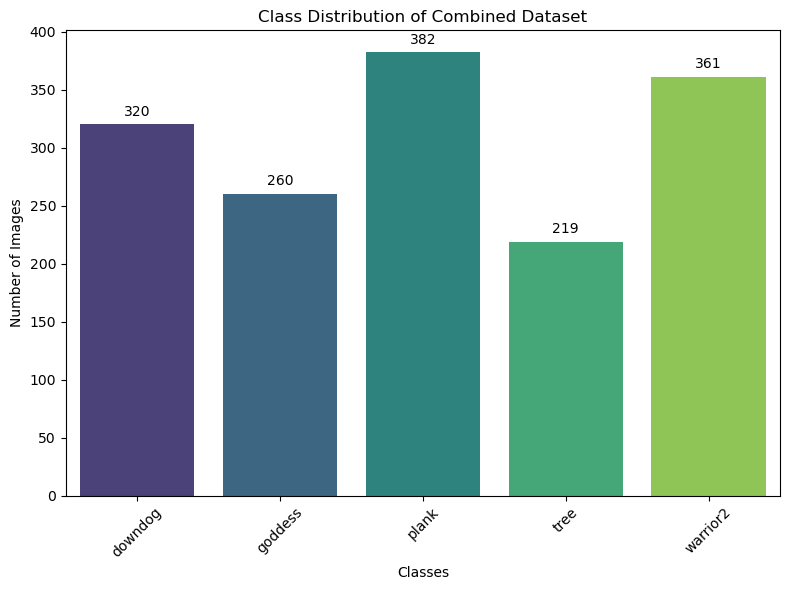

In [16]:
import os
import seaborn as sns
import matplotlib.pyplot as plt

def plot_class_distribution(dataset_directories):
    class_counts = {}
    
    # Loop through each dataset directory (TRAIN and TEST)
    for directory in dataset_directories:
        # Assuming each subfolder in the directory represents a class
        class_folders = os.listdir(directory)
        
        # Count the number of images in each class folder
        for class_folder in class_folders:
            class_path = os.path.join(directory, class_folder)
            image_count = len(os.listdir(class_path))
            
            # Update the class counts dictionary
            class_counts[class_folder] = class_counts.get(class_folder, 0) + image_count
    
    # Convert class_counts dictionary to DataFrame for Seaborn
    class_data = {'Classes': list(class_counts.keys()), 'Number of Images': list(class_counts.values())}
    class_df = pd.DataFrame(class_data)
    
    # Plotting the class distribution using Seaborn with count values displayed on top of bars
    plt.figure(figsize=(8, 6))
    sns.barplot(x='Classes', y='Number of Images', data=class_df, palette='viridis')
    plt.xlabel('Classes')
    plt.ylabel('Number of Images')
    plt.title('Class Distribution of Combined Dataset')
    plt.xticks(rotation=45)  # Rotate class labels for better readability
    
    # Display count values on top of each bar
    for index, value in enumerate(class_df['Number of Images']):
        plt.text(index, value + 5, str(value), ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

# Paths to TRAIN and TEST dataset directories
train_directory = "C:\\Users\\AISHWARYA UBALE\\Downloads\\archive (6)\\DATASET\\TRAIN"
test_directory = "C:\\Users\\AISHWARYA UBALE\\Downloads\\archive (6)\\DATASET\\TEST"

# Combine both TRAIN and TEST dataset directories
combined_directories = [train_directory, test_directory]

# Plotting the class distribution of the combined datasets with count values on bars
plot_class_distribution(combined_directories)

In [17]:
## Print Skeleton on the image overlaid on it:

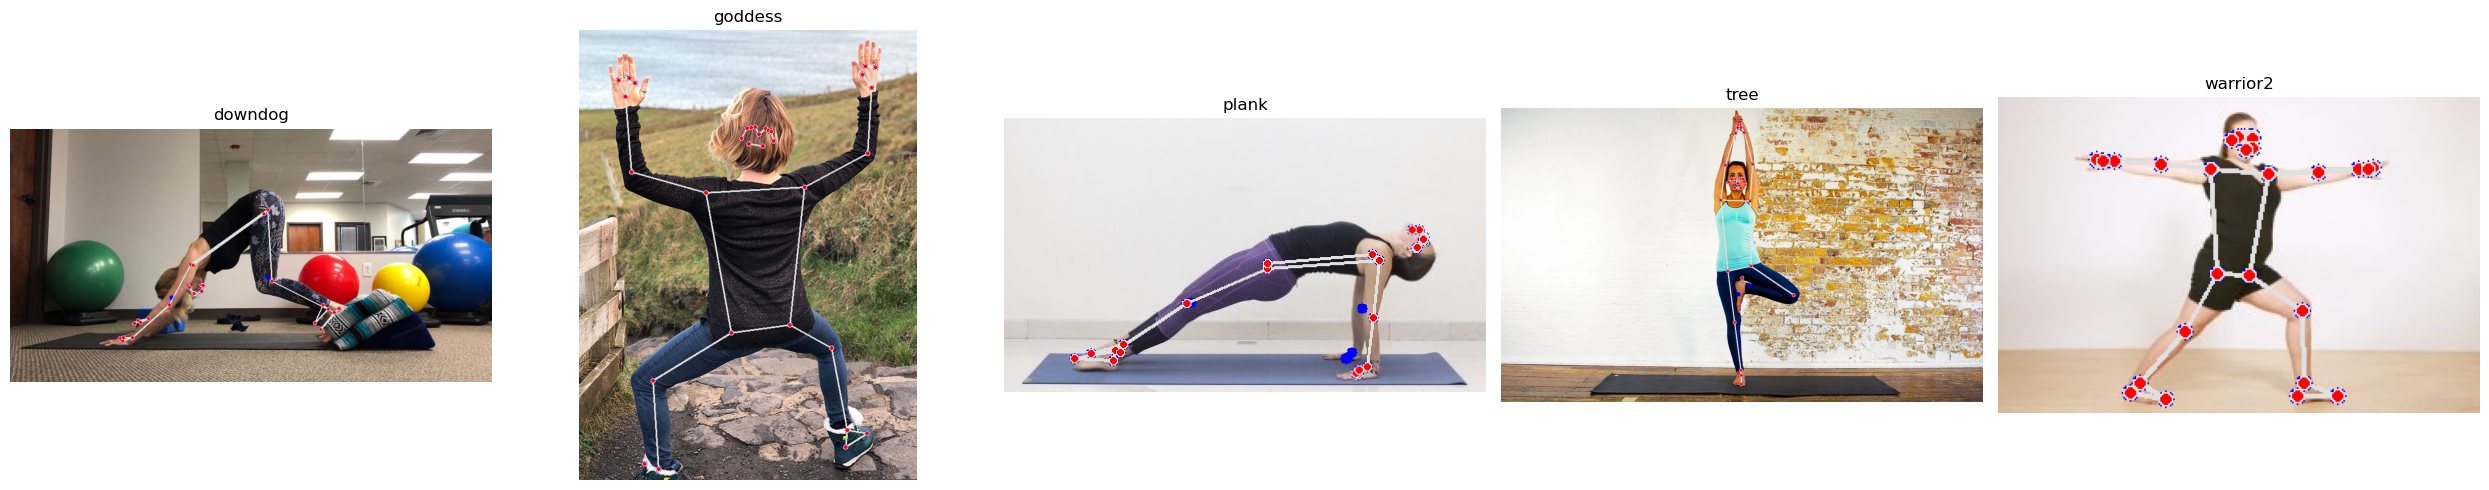

In [18]:
import mediapipe as mp
import cv2
import matplotlib.pyplot as plt
import os
import random

# Assuming you have the image path and MediaPipe setup
image_dirpath = "C:\\Users\\AISHWARYA UBALE\\Downloads\\archive (6)\\DATASET\\TRAIN\\"  # Replace with your image path

mpPose = mp.solutions.pose

fig, axs = plt.subplots(1, 5, figsize=(25, 5))  # Adjust the size and number of columns as needed

for idx, imgfolder in enumerate(os.listdir(image_dirpath)):
    imgpath = os.path.join(image_dirpath, imgfolder)
    
    # Get list of images in the folder
    images_in_folder = os.listdir(imgpath)
    random_img = random.choice(images_in_folder)  # Choose a random image
    
    # Load the randomly selected image
    image = cv2.imread(os.path.join(imgpath, random_img))
    imageRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Initialize MediaPipe Pose
    pose = mpPose.Pose()
    
    # Process the image
    results = pose.process(imageRGB)
    
    # Draw landmarks and connections on the image
    if results.pose_landmarks:
        for landmark in results.pose_landmarks.landmark:
            x = int(landmark.x * image.shape[1])
            y = int(landmark.y * image.shape[0])
            cv2.circle(image, (x, y), 5, (255, 0, 0), -1)  # Draw landmarks as circles
            
        # Draw connections between landmarks to visualize the skeleton
        mpDraw = mp.solutions.drawing_utils
        mpDraw.draw_landmarks(image, results.pose_landmarks, mpPose.POSE_CONNECTIONS)
        
    # Display the image with the overlaid skeleton in a subplot
    axs[idx].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axs[idx].axis('off')
    axs[idx].set_title(imgfolder)
    
plt.tight_layout()
plt.show()


## Now trying to implement the machine learning models:

In [19]:
#Read the training dataset:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
data = pd.read_csv("training_dataset_with target_all3posses.csv")
X,Y = data.iloc[:,:132],data['target']

In [20]:
# # Assuming X contains landmark features and Y contains labels/targets

# # Check dimensions
# if len(X) == len(Y):
#     print("Dimensions match: X and Y have the same number of samples.")

# import random

# # Visual inspection of a few samples
# indices_to_check = random.sample(list(X.index), 5)  # Assuming you want to check 5 samples

# print(indices_to_check)
# # Print features from X and their corresponding labels from Y
# for idx in indices_to_check:
#     print(f"Sample {idx}: Landmarks - {X.loc[idx].values}, Label - {Y.loc[idx]}")

# print("\n\n")

# #Renaming the first column to Row_id:
# X = X.rename(columns={X.columns[0]: 'row_id'})
# print(X.columns)
# print(X.head(3))

In [21]:
#Splitting the data    
    
X_train, X_ttest, y_train, y_ttest = train_test_split(X, Y, test_size=0.2, random_state=42)


class_counts = data['target'].value_counts()
print("TYPE: ",type(class_counts))
print("Class Distribution:\n\n\n")
print(class_counts.index)
print("TYPE: ",type(class_counts))

# Convert the index (keys) to integers
class_counts.index = class_counts.index.astype(int)

print(class_counts.index)

TYPE:  <class 'pandas.core.series.Series'>
Class Distribution:



Float64Index([1.0, 0.0, 3.0, 4.0, 2.0], dtype='float64')
TYPE:  <class 'pandas.core.series.Series'>
Int64Index([1, 0, 3, 4, 2], dtype='int64')


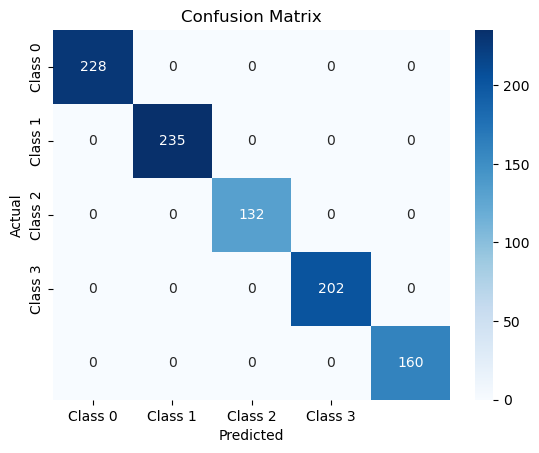

In [22]:
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

confusion_matrix = metrics.confusion_matrix(Y, Y)

# Plot confusion matrix using seaborn
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2','Class 3'], yticklabels=['Class 0', 'Class 1', 'Class 2','Class 3'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [23]:
#Read the test dataset

test_data = pd.read_csv("testing_dataset3_with target_allposses.csv")
#X_test = test_data.iloc[:, :132]

X_test,Y_test = test_data.iloc[:,:132],test_data['target']

In [24]:
class_counts = test_data['target'].value_counts()

print("Class Distribution:")
print(class_counts)

Class Distribution:
1.0    104
0.0    102
3.0     91
4.0     76
2.0     62
Name: target, dtype: int64


[[102   0   0   0   0]
 [  0 104   0   0   0]
 [  0   0  62   0   0]
 [  0   0   0  91   0]
 [  0   0   0   0  76]]


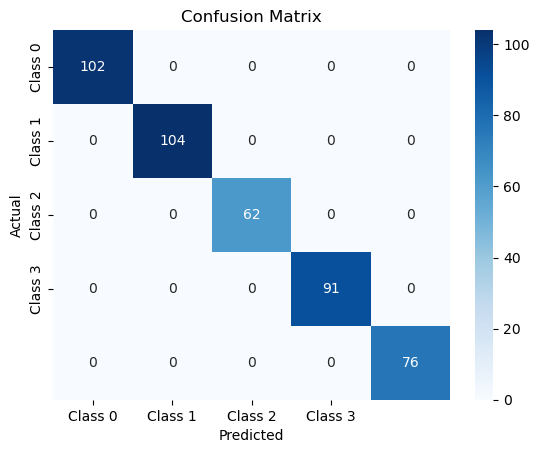

In [25]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(Y_test, Y_test)
print(confusion_matrix)
# Plot confusion matrix using seaborn
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2','Class 3'], yticklabels=['Class 0', 'Class 1', 'Class 2','Class 3'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [26]:

# from sklearn.metrics import classification_report

# # Assuming you have already trained your model and obtained predictions
# predictions = model.predict(X_test)

# # Generate a classification report
# report = classification_report(Y_test, predictions)

# # Print the classification report
# print("Classification Report:\n", report)


In [27]:
#Pose model extraction

mpPose = mp.solutions.pose
pose = mpPose.Pose()
mpDraw = mp.solutions.drawing_utils

In [28]:
# Convert the index (keys) to integers
y_train = y_train.astype(int)
y_ttest = y_ttest.astype(int)

Y_test = Y_test.astype(int)



In [29]:
# Assuming y_train contains your class labels

# Calculate class frequencies
class_frequencies = class_counts.values # Replace with your actual counts

print(class_frequencies)


# Calculate weights inversely proportional to class frequencies
sample_weights = [1 / freq for freq in class_frequencies]

# Assign the calculated weights to the respective classes
# For example, if class 1 is labeled as 0, and other classes are labeled as 1, 2, and 3:
sample_weights_assigned = [sample_weights[label] for label in y_train]

[104 102  91  76  62]


In [30]:
print(class_frequencies)

sample_weights

[104 102  91  76  62]


[0.009615384615384616,
 0.00980392156862745,
 0.01098901098901099,
 0.013157894736842105,
 0.016129032258064516]

In [31]:
y_train.values[0]

4

In [32]:
print(len(sample_weights_assigned))
len(y_train)

765


765

In [33]:
X_train.columns

Index(['Unnamed: 0', 'NOSE_x', 'NOSE_y', 'NOSE_z', 'NOSE_vis',
       'LEFT_EYE_INNER_x', 'LEFT_EYE_INNER_y', 'LEFT_EYE_INNER_z',
       'LEFT_EYE_INNER_vis', 'LEFT_EYE_x',
       ...
       'RIGHT_HEEL_y', 'RIGHT_HEEL_z', 'RIGHT_HEEL_vis', 'LEFT_FOOT_INDEX_x',
       'LEFT_FOOT_INDEX_y', 'LEFT_FOOT_INDEX_z', 'LEFT_FOOT_INDEX_vis',
       'RIGHT_FOOT_INDEX_x', 'RIGHT_FOOT_INDEX_y', 'RIGHT_FOOT_INDEX_z'],
      dtype='object', length=132)

In [34]:
X_train.rename(columns={'Unnamed: 0': 'row_id'}, inplace=True)

In [35]:
X_ttest.rename(columns={'Unnamed: 0': 'row_id'}, inplace=True)

In [36]:
X_test.rename(columns={'Unnamed: 0': 'row_id'}, inplace=True)

In [37]:
import pandas as pd

# Assuming 'row_id' is the name of the column to be removed

# Removing 'row_id' from X_train
X_train = X_train.drop('row_id', axis=1)  # axis=1 specifies column-wise operation

# Removing 'row_id' from X_test
X_ttest = X_ttest.drop('row_id', axis=1)

# Removing 'row_id' from X_test
X_test = X_test.drop('row_id', axis=1)


### SVC Model

In [44]:
# model = SVC(kernel='poly',class_weight='balanced', probability=True,random_state=42)
# model.fit(X_train,y_train, sample_weight=sample_weights_assigned)

model = SVC(kernel='poly',class_weight='balanced', probability=True,random_state=42)
model.fit(X_train,y_train)
#model.fit(X_train,y_train, sample_weight=sample_weights_assigned)

predictions = model.predict(X_test)
#actual_labels = test_data['target']

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.3563218390804598


In [460]:
predicted_probabilities = model.predict_proba(X_test)
# The result is a 2D array where each row corresponds to a data point and contains the probabilities for each class
print("Prediction Probabilities:")
#print(predicted_probabilities)

Prediction Probabilities:


[[96  5  1  0  0]
 [ 1 82 18  0  3]
 [ 2  5 55  0  0]
 [ 4  0  0 86  1]
 [ 6 13 14  5 38]]


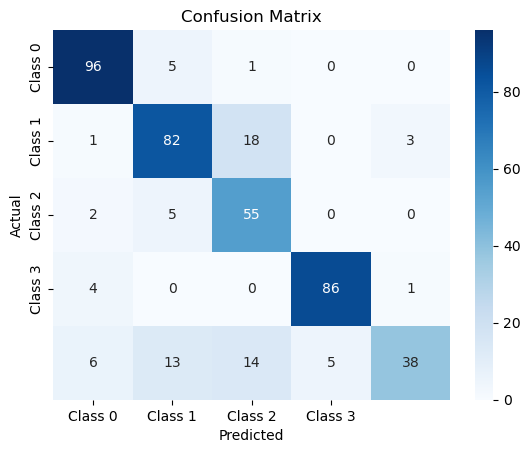

In [461]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(Y_test, predictions)

print(confusion_matrix)

# Plot confusion matrix using seaborn
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2','Class 3'], yticklabels=['Class 0', 'Class 1', 'Class 2','Class 3'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

1    190
0    184
3    168
4    125
2     98
Name: target, dtype: int64


<Axes: title={'center': 'Class Distribution'}>

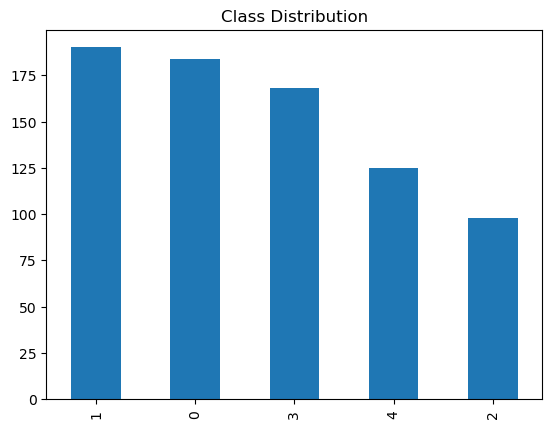

In [462]:
import pandas as pd

# Assuming 'df' is your DataFrame and 'target_column' contains the class labels (e.g., 'Class')
class_distribution = y_train.value_counts()
print(class_distribution)
# Plotting histogram or bar plot to visualize class distribution
class_distribution.plot(kind='bar', title='Class Distribution')


Index(['NOSE_x', 'NOSE_y', 'NOSE_z', 'NOSE_vis', 'LEFT_EYE_INNER_x',
       'LEFT_EYE_INNER_y', 'LEFT_EYE_INNER_z', 'LEFT_EYE_INNER_vis',
       'LEFT_EYE_x', 'LEFT_EYE_y',
       ...
       'RIGHT_HEEL_y', 'RIGHT_HEEL_z', 'RIGHT_HEEL_vis', 'LEFT_FOOT_INDEX_x',
       'LEFT_FOOT_INDEX_y', 'LEFT_FOOT_INDEX_z', 'LEFT_FOOT_INDEX_vis',
       'RIGHT_FOOT_INDEX_x', 'RIGHT_FOOT_INDEX_y', 'RIGHT_FOOT_INDEX_z'],
      dtype='object', length=131)


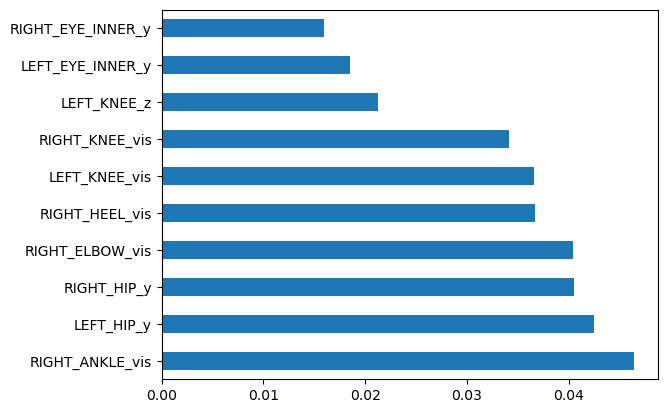

In [463]:
from sklearn.ensemble import RandomForestClassifier

# Assuming you have X_train and y_train
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Feature importance
feature_importance = pd.Series(clf.feature_importances_, index=X_train.columns)
feature_importance.nlargest(10).plot(kind='barh')  # Plotting top 10 features


print(X_train.columns)

In [464]:
print(predictions)

[3 0 4 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 3
 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 3 2 2 2 4 4 4 1 1 0 4 4
 4 4 4 4 1 4 1 4 1 4 1 4 2 4 2 2 2 2 2 4 2 2 4 2 2 2 1 4 4 4 4 4 4 4 1 1 4
 1 4 1 4 4 1 0 4 4 4 4 4 4 4 4 4 4 4 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 2 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 2 1 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 1
 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 1
 1 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 2 2 4 2 2 2 2 1 1 1 1 1 1 1 1 1 2 1 1 1 1]


In [465]:
print(Y_test)



0      3
1      3
2      3
3      3
4      3
      ..
430    1
431    1
432    1
433    1
434    1
Name: target, Length: 435, dtype: int32


In [466]:
print(len(Y_test))

print(len(predictions))

print(len(sample_weights_assigned_test))

435
435
192


In [468]:
sample_weights_assignedtestt = [sample_weights[label] for label in Y_test]

In [469]:
from sklearn.metrics import precision_score, recall_score, f1_score
# Calculate evaluation metrics with sample weights

# Calculate classification report with sample weights
report = classification_report(Y_test, predictions, sample_weight=sample_weights_assignedtestt)

print(report)


              precision    recall  f1-score   support

           0       0.84      0.94      0.89 0.9807692307692295
           1       0.72      0.79      0.75 1.0196078431372535
           2       0.59      0.89      0.71 0.6813186813186809
           3       0.93      0.95      0.94 1.1973684210526316
           4       0.94      0.50      0.65 1.2258064516129024

    accuracy                           0.80 5.104870627890698
   macro avg       0.80      0.81      0.79 5.104870627890698
weighted avg       0.83      0.80      0.79 5.104870627890698



### Model 2 - Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier

# Create and train the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train,y_train)


RandomForestClassifier(random_state=42)

Training Accuracy: 1.0
Training Confusion Matrix:
[[184   0   0   0   0]
 [  0 190   0   0   0]
 [  0   0  98   0   0]
 [  0   0   0 168   0]
 [  0   0   0   0 125]]


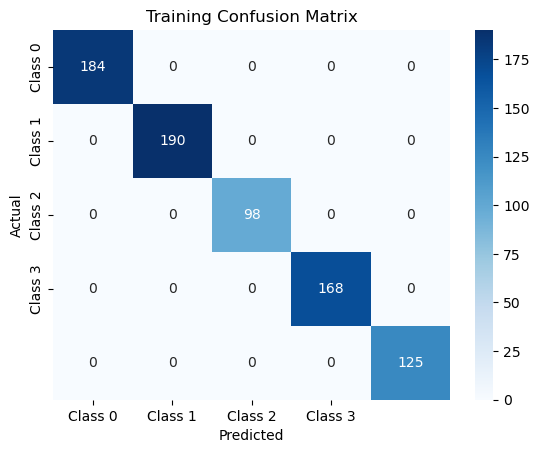

In [42]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Predictions on training data
train_predictions = model.predict(X_train)

# Calculate accuracy on training data
train_accuracy = accuracy_score(y_train, train_predictions)
print("Training Accuracy:", train_accuracy)

# Confusion matrix for training data
train_conf_matrix = confusion_matrix(y_train, train_predictions)

# Print confusion matrix for training data
print("Training Confusion Matrix:")
print(train_conf_matrix)

# Plot confusion matrix using seaborn
sns.heatmap(train_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2','Class 3'], yticklabels=['Class 0', 'Class 1', 'Class 2','Class 3'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Training Confusion Matrix')
plt.show()

In [43]:
predictions = model.predict(X_test)
#actual_labels = test_data['target']

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.8160919540229885


[[100   1   0   0   1]
 [  2  79  20   1   2]
 [  2   0  58   1   1]
 [  5   0   0  86   0]
 [  5  18   9  12  32]]


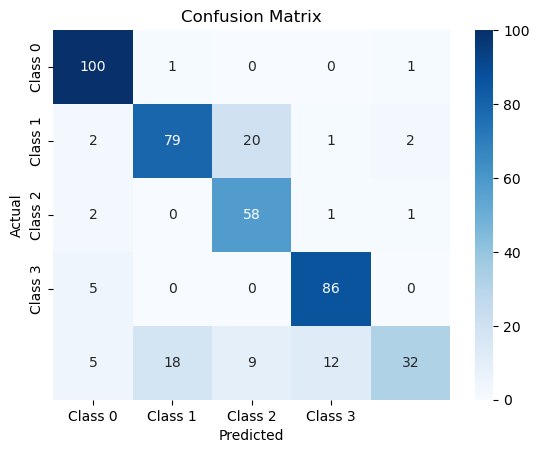

In [44]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(Y_test, predictions)
print(confusion_matrix)
# Plot confusion matrix using seaborn
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2','Class 3'], yticklabels=['Class 0', 'Class 1', 'Class 2','Class 3'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#Additonal metrics for best suited model

In [1]:
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, roc_curve, roc_auc_score, f1_score, cohen_kappa_score
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
import seaborn as sns

# Predictions using the model
y_scores = model.predict_proba(X_test)

# Precision-Recall Curves for each class using a one-vs-rest strategy
plt.figure(figsize=(8, 6))
for i in range(len(class_counts)):  # Loop through each class
    precisions, recalls, thresholds = precision_recall_curve((Y_test == i).astype(int), y_scores[:, i])
    plt.plot(recalls, precisions, marker='.', label=f'Class {i}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves for each Class (One-vs-Rest)')
plt.legend()
plt.show()




NameError: name 'model' is not defined

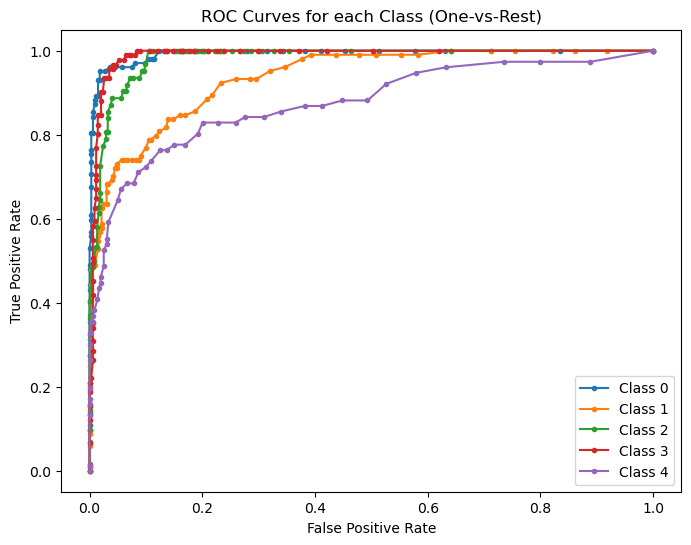

In [54]:
# Assuming you have a trained model named 'model' and test data 'X_test', 'y_test'

# ROC Curves for each class using a one-vs-rest strategy
plt.figure(figsize=(8, 6))
for i in range(len(class_counts)):  # Loop through each class
    fpr, tpr, thresholds = roc_curve((Y_test == i).astype(int), y_scores[:, i])
    plt.plot(fpr, tpr, marker='.', label=f'Class {i}')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for each Class (One-vs-Rest)')
plt.legend()
plt.show()

In [55]:
# F1 Score
f1 = f1_score(Y_test, predictions, average='weighted')
print('Weighted F1 Score:', f1)

# Kappa Statistic
kappa = cohen_kappa_score(Y_test, predictions)
print('Kappa Statistic:', kappa)

# Cross-Validation (example using precision scores)
cv_precision = cross_val_predict(model, X_test, Y_test, cv=5, method='predict_proba')  # Replace 'predict_proba' with 'decision_function' if needed

Weighted F1 Score: 0.8033003468537419
Kappa Statistic: 0.7682703512568669


In [56]:
print("Cross-Validated Predictions:", cv_precision)

Cross-Validated Predictions: [[0.3  0.05 0.01 0.61 0.03]
 [0.35 0.06 0.01 0.45 0.13]
 [0.32 0.14 0.04 0.37 0.13]
 ...
 [0.02 0.22 0.36 0.   0.4 ]
 [0.   0.52 0.17 0.   0.31]
 [0.01 0.5  0.19 0.   0.3 ]]


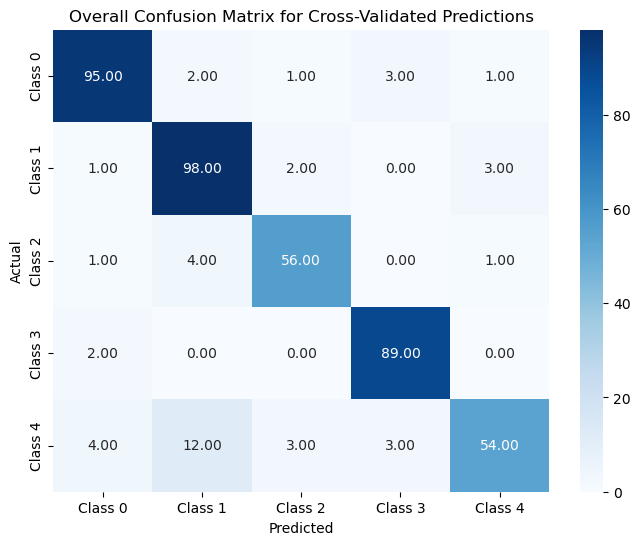

In [63]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming 'model' is your trained model and 'X_test', 'Y_test' are your test data
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize an empty confusion matrix
num_classes = len(np.unique(Y_test))
overall_conf_matrix = np.zeros((num_classes, num_classes))

# Convert DataFrame to arrays
X_test_array = X_test.to_numpy()
Y_test_array = Y_test.to_numpy()

# Perform cross-validation and collect confusion matrices
for train_index, test_index in skf.split(X_test_array, Y_test_array):
    X_train_fold, X_val_fold = X_test_array[train_index], X_test_array[test_index]
    y_train_fold, y_val_fold = Y_test_array[train_index], Y_test_array[test_index]

    model.fit(X_train_fold, y_train_fold)
    y_pred_fold = model.predict(X_val_fold)
    conf_matrix = confusion_matrix(y_val_fold, y_pred_fold)
    overall_conf_matrix += conf_matrix

# Plot the overall confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(overall_conf_matrix, annot=True, cmap='Blues', fmt='.2f', xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4'], yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Overall Confusion Matrix for Cross-Validated Predictions')
plt.show()


## Decision Tree Classifier

In [475]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

# Predict on the test set
predictions = clf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.664367816091954


[[94  3  0  1  4]
 [ 6 67 11  7 13]
 [ 7  3 41  1 10]
 [11 27  1 51  1]
 [ 7 20  4  9 36]]


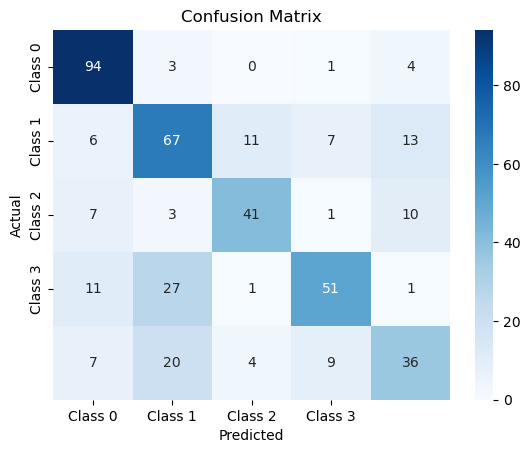

In [476]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(Y_test, predictions)
print(confusion_matrix)
# Plot confusion matrix using seaborn
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2','Class 3'], yticklabels=['Class 0', 'Class 1', 'Class 2','Class 3'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Model 3- KNN Classifier

In [477]:
from sklearn.neighbors import KNeighborsClassifier

# Create and train the KNN Classifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

KNeighborsClassifier()

Training Accuracy: 0.8614379084967321
Training Confusion Matrix:
[[166   4   3   8   3]
 [  9 163   6   1  11]
 [  1  11  79   0   7]
 [ 15   0   0 153   0]
 [  5  18   3   1  98]]


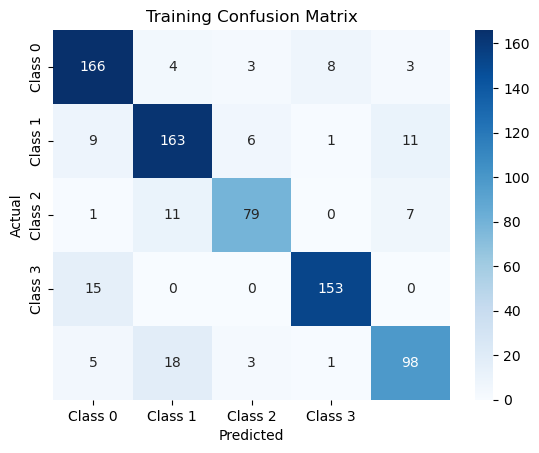

In [478]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Predictions on training data
train_predictions = model.predict(X_train)

# Calculate accuracy on training data
train_accuracy = accuracy_score(y_train, train_predictions)
print("Training Accuracy:", train_accuracy)

# Confusion matrix for training data
train_conf_matrix = confusion_matrix(y_train, train_predictions)

# Print confusion matrix for training data
print("Training Confusion Matrix:")
print(train_conf_matrix)

# Plot confusion matrix using seaborn
sns.heatmap(train_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2','Class 3'], yticklabels=['Class 0', 'Class 1', 'Class 2','Class 3'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Training Confusion Matrix')
plt.show()

In [479]:
predictions = model.predict(X_test)
#actual_labels = test_data['target']

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.7793103448275862


Testing Confusion Matrix:
[[91  5  0  4  2]
 [ 0 86  8  1  9]
 [ 1 10 42  0  9]
 [12  2  0 76  1]
 [ 6 16  6  4 44]]


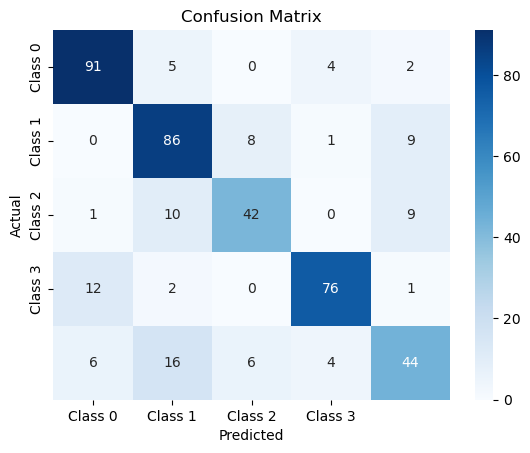

In [480]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(Y_test, predictions)

# Print confusion matrix for training data
print("Testing Confusion Matrix:")
print(confusion_matrix)

# Plot confusion matrix using seaborn
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2','Class 3'], yticklabels=['Class 0', 'Class 1', 'Class 2','Class 3'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [481]:
from sklearn.metrics import classification_report

# Assuming you have already trained your model and obtained predictions
predictions = model.predict(X_test)

# Generate a classification report
report = classification_report(Y_test, predictions)

# Print the classification report
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86       102
           1       0.72      0.83      0.77       104
           2       0.75      0.68      0.71        62
           3       0.89      0.84      0.86        91
           4       0.68      0.58      0.62        76

    accuracy                           0.78       435
   macro avg       0.77      0.76      0.77       435
weighted avg       0.78      0.78      0.78       435



### Model 4 - Multinomial Naive Bayes:

In [34]:
from sklearn.model_selection import GridSearchCV

# Assuming X_train_scaled, X_test_scaled, y_train, y_test are already defined

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_ttest)

model = MultinomialNB()
model.fit(X_train_scaled, y_train)

alphas = [0.1, 2.0, 3, 4.0]  # Try different alpha values

param_grid = {'alpha': alphas}

model = MultinomialNB()

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=7, scoring='accuracy')
grid.fit(X_train_scaled, y_train)

best_alpha = grid.best_params_['alpha']
print("Best Alpha:", best_alpha)

best_model = MultinomialNB(alpha=best_alpha)
best_model.fit(X_train_scaled, y_train)

predictions = best_model.predict(X_test_scaled)
accuracy = accuracy_score(y_ttest, predictions)
print("Accuracy:", accuracy)


Best Alpha: 0.1
Accuracy: 0.578125


In [223]:
### Model 5 - 

In [482]:
from sklearn.ensemble import GradientBoostingClassifier

# Create and train the Gradient Boosting Classifier
model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)
model.fit(X_train, y_train)

predictions = model.predict(X_test)
#actual_labels = test_data['target']

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.7540229885057471


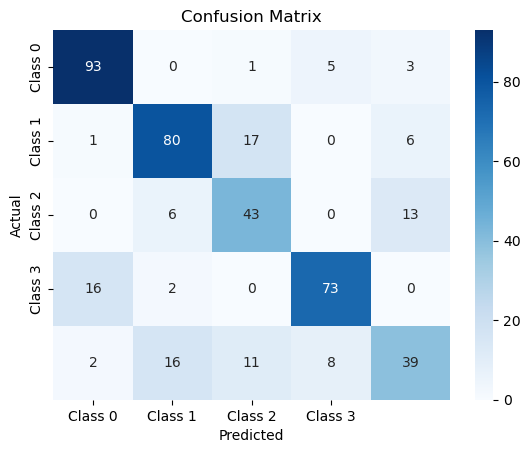

In [483]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(Y_test, predictions)

# Plot confusion matrix using seaborn
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2','Class 3'], yticklabels=['Class 0', 'Class 1', 'Class 2','Class 3'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
## Testing the augmentation - Image dataset

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
import cv2

# Path to your dataset (original images)
original_dataset_path = "C:\\Users\\AISHWARYA UBALE\\Downloads\\archive (6)\\DATASET\\TRAIN_GODDESS_TREE" # enter dataset path

import glob

# Path to the directory containing images
folder_path = original_dataset_path

# Define the patterns for JPG and PNG image files
jpg_pattern = folder_path + '/*.jpg'
png_pattern = folder_path + '/*.png'

# Count the number of JPG and PNG image files
jpg_count = len(glob.glob(jpg_pattern))
png_count = len(glob.glob(png_pattern))

total_images = jpg_count + png_count

print(f"Total JPG images: {jpg_count}")
print(f"Total PNG images: {png_count}")
print(f"Total images in the folder: {total_images}")

Total JPG images: 0
Total PNG images: 0
Total images in the folder: 0


In [6]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [7]:
# Path to save augmented images
augmented_images_path = 'C:\\Users\\AISHWARYA UBALE\\Downloads\\train_tree_AUGMENTED'

# Create a directory to save augmented images if it doesn't exist
os.makedirs(augmented_images_path, exist_ok=True)

# Define augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    zoom_range=0.1,
    fill_mode='nearest'
)

# Create a flow from directory generator to read images from original dataset
# Adjust batch_size, target_size, and class_mode based on your dataset
image_generator = datagen.flow_from_directory(
    original_dataset_path,
    target_size=(224, 224),  # Adjust the target size of your images
    batch_size=32,
    class_mode='categorical',
    save_to_dir=augmented_images_path,  # Directory to save augmented images
    save_prefix='augmented',  # Prefix for saved images
    save_format='jpg'  # Save images in JPG format
)

# Specify the number of images you want to generate
num_augmented_images = 100  # Change this based on your requirement

# Generate augmented images and save them
for i in range(num_augmented_images):
    batch = image_generator.next()  # Generates a batch of augmented images
    if i % 10 == 0:
        print(f"Generated {i} augmented images")

Found 150 images belonging to 1 classes.
Generated 0 augmented images
Generated 10 augmented images
Generated 20 augmented images
Generated 30 augmented images
Generated 40 augmented images
Generated 50 augmented images
Generated 60 augmented images
Generated 70 augmented images
Generated 80 augmented images
Generated 90 augmented images


### Ignore the following

In [ ]:
import cv2
import mediapipe as mp

def detect_pose_realtime():
    # Initialize VideoCapture object to capture from the camera
    cap = cv2.VideoCapture(0)  # Use 0 for default webcam, change to another number for different cameras

    # Initialize MediaPipe Pose model
    mp_pose = mp.solutions.pose
    pose = mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5)

    while cap.isOpened():
        # Read a frame from the camera
        ret, frame = cap.read()
        if not ret:
            break

        # Flip the frame horizontally for a mirror effect
        frame = cv2.flip(frame, 1)

        # Convert the image to RGB and process it for pose detection
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        results = pose.process(image)

        # Draw pose landmarks on the frame
        if results.pose_landmarks:
            mp_drawing = mp.solutions.drawing_utils
            mp_drawing.draw_landmarks(
                frame, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

        # Show the frame with landmarks
        cv2.imshow('BlazePose Detection', frame)

        # Press 'q' to exit the loop
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # Release the VideoCapture and close all windows
    cap.release()
    cv2.destroyAllWindows()
    pose.close()

# Call the function to start real-time pose detection
detect_pose_realtime()


In [2]:
import os
import cv2
import mediapipe as mp

def detect_and_save_pose():
    cap = cv2.VideoCapture(0)
    mp_pose = mp.solutions.pose
    pose = mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5)

    frame_count = 0
    folder_path = r'C:\Users\AISHWARYA UBALE\Documents\CameraCapturedAnnotatedImages'

    # Create the directory if it doesn't exist
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        frame = cv2.flip(frame, 1)
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        results = pose.process(image)

        if results.pose_landmarks:
            mp_drawing = mp.solutions.drawing_utils
            mp_drawing.draw_landmarks(
                frame, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

            # Save annotated frames in the specified folder
            annotated_filename = os.path.join(folder_path, f'annotated_frame_{frame_count}.jpg')
            cv2.imwrite(annotated_filename, frame)
            frame_count += 1

        cv2.imshow('BlazePose Detection', frame)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()
    pose.close()

detect_and_save_pose()


In [98]:
X.shape

(966, 132)

In [99]:
results = pose.process(imgRGB)

In [100]:
#imgRGB

In [101]:
#results.pose_landmarks

In [109]:
test_data = pd.read_csv("testing_dataset3_with target_allposses.csv")

In [110]:
test_data.head(5)

,Unnamed: 0,NOSE_x,NOSE_y,NOSE_z,NOSE_vis,LEFT_EYE_INNER_x,LEFT_EYE_INNER_y,LEFT_EYE_INNER_z,LEFT_EYE_INNER_vis,LEFT_EYE_x,...,RIGHT_HEEL_vis,LEFT_FOOT_INDEX_x,LEFT_FOOT_INDEX_y,LEFT_FOOT_INDEX_z,LEFT_FOOT_INDEX_vis,RIGHT_FOOT_INDEX_x,RIGHT_FOOT_INDEX_y,RIGHT_FOOT_INDEX_z,RIGHT_FOOT_INDEX_vis,target
0,1045,0.441700,0.694201,-0.096439,0.997566,0.416444,0.695569,-0.137276,0.998209,0.413817,...,0.413311,0.825927,0.860303,-0.317801,0.972257,0.809430,0.840739,0.287854,0.439358,4.0
1,1046,0.378846,0.717390,-0.020918,0.997744,0.360062,0.707027,-0.065380,0.998329,0.359729,...,0.420324,0.794249,0.955767,-0.372992,0.972202,0.776637,0.924903,0.338004,0.441726,4.0
2,1047,0.394866,0.642226,-0.021269,0.997950,0.369800,0.646245,-0.055329,0.998481,0.367126,...,0.418572,0.806704,0.843974,-0.208756,0.972188,0.801038,0.827370,0.289733,0.449103,4.0
3,1048,0.569671,0.566876,-0.119233,0.998152,0.560455,0.588558,-0.165436,0.998632,0.558476,...,0.428230,0.848695,0.741254,0.262044,0.970567,0.812981,0.713256,0.615784,0.471292,4.0
4,1049,0.507775,0.584656,-0.417670,0.996134,0.205885,0.584777,-0.424889,0.997142,0.257835,...,0.473842,0.566466,0.735029,0.309761,0.950016,0.161110,0.789532,-0.315338,0.512743,4.0


In [112]:

temp = []

for i,j in zip(points,test_data):
    temp = temp + [j.x, j.y, j.z, j.visibility]
    print(temp)
    break

AttributeError: 'str' object has no attribute 'x'

In [75]:

y = model.predict([temp])
print(y)
if y == 0:
    asan = "goddess"
else:
    asan = "ooo"
    print(asan)


[1.]
ooo


C:\Users\AISHWARYA UBALE\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [68]:
path = "C:\\Users\\AISHWARYA UBALE\\Downloads\\archive (6)\\DATASET\\TEST\\goddess"

for img in os.listdir(path):

        temp = []

        img = cv2.imread(path + "/" + img)

        imageWidth, imageHeight = img.shape[:2]

        imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        blackie = np.zeros(img.shape) # Blank image

        results = pose.process(imgRGB)

        if results.pose_landmarks:

                landmarks = results.pose_landmarks.landmark

                for i,j in zip(points,landmarks):

                        temp = temp + [j.x, j.y, j.z, j.visibility]
                
                y = model.predict([temp])
               

ValueError: X has 132 features, but RandomForestClassifier is expecting 131 features as input.

In [ ]:
path = "C:\\Users\\AISHWARYA UBALE\\Downloads\\archive (6)\\DATASET\\TEST"

counterfolder = 0;
for imgfolder in os.listdir(path):
    print(imgfolder)
    imgpath = path + "//" + imgfolder
    for img in os.listdir(imgpath):
        
        temp = []
        #print(img)
        img = cv2.imread(imgpath + "/" + img)
        
        imageWidth, imageHeight = img.shape[:2]

        imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        blackie = np.zeros(img.shape) # Blank image

        results = pose.process(imgRGB)

        if results.pose_landmarks:

                # mpDraw.draw_landmarks(img, results.pose_landmarks, mpPose.POSE_CONNECTIONS) #draw landmarks on image

                mpDraw.draw_landmarks(blackie, results.pose_landmarks, mpPose.POSE_CONNECTIONS) # draw landmarks on blackie

                landmarks = results.pose_landmarks.landmark

                #***#
                
                if results.pose_landmarks:

                landmarks = results.pose_landmarks.landmark

                for i,j in zip(points,landmarks):

                        temp = temp + [j.x, j.y, j.z, j.visibility]
                
                y = model.predict([temp])
                print(y)
                if y == 0:
                    asan = "goddess"
                else:
                    asan = "ooo"

                print(asan)
                
                #**#
                
                for i,j in zip(points,landmarks):

                        temp = temp + [j.x, j.y, j.z, j.visibility]
                
                #Assign target value (0 for the first pose, 1 for the rest)
                if imgfolder == "plank":
                    target = 0 
                elif imgfolder == "warrior2":
                    target = 1
                elif imgfolder == "tree":
                    target = 2 
                elif imgfolder == "goddess":
                    target = 3
                elif imgfolder == "downdog":
                    target = 4
                
                temp.append(target)
                
                data.loc[count] = temp

                count +=1

        #cv2.imshow("Image", img)

        #cv2.imshow("blackie",blackie)

        #cv2.waitKey(100)

data.to_csv("testing_dataset3_with target_allposses.csv") # save the data as a csv file